## Building and Training the Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras import datasets, layers, models

In [2]:
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255, test_images / 255

In [4]:
print("Training:",train_images.shape)
print("Testing:",test_images.shape)

Training: (50000, 32, 32, 3)
Testing: (10000, 32, 32, 3)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

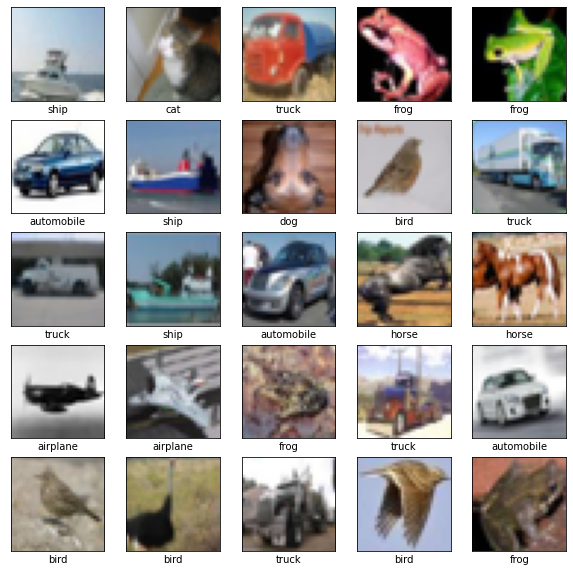

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+100], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i+100][0]])
plt.show()

In [7]:
newModel = models.Sequential([
    layers.Conv2D(96, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3), name='3x3_1'),
    #layers.Conv2D(96, (3,3), activation='relu', padding='same', name='3x3_2'),
    layers.Conv2D(96, (3,3), activation='relu', strides=[2,2], name='poolconv_1'),
    #layers.MaxPooling2D((2,2)),
    layers.Conv2D(192, (3,3), activation='relu', padding='same', name='3x3_3'),
    #layers.Conv2D(192, (3,3), activation='relu', padding='same', name='3x3_4'),
    layers.Conv2D(192, (3,3), activation='relu', strides=[2,2], name='poolconv_2'),
    #layers.MaxPooling2D((2,2)),
    layers.Conv2D(192, (3,3), activation='relu', padding='same', name='3x3_5'),
    layers.Conv2D(192, (1,1), activation='relu', name='1x1_1'),
    layers.Conv2D(10, (1,1), activation='relu', name='1x1_2'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax', kernel_regularizer='l2')
], name = "newModel")

newModel.summary()

Model: "newModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
3x3_1 (Conv2D)               (None, 32, 32, 96)        2688      
_________________________________________________________________
poolconv_1 (Conv2D)          (None, 15, 15, 96)        83040     
_________________________________________________________________
3x3_3 (Conv2D)               (None, 15, 15, 192)       166080    
_________________________________________________________________
poolconv_2 (Conv2D)          (None, 7, 7, 192)         331968    
_________________________________________________________________
3x3_5 (Conv2D)               (None, 7, 7, 192)         331968    
_________________________________________________________________
1x1_1 (Conv2D)               (None, 7, 7, 192)         37056     
_________________________________________________________________
1x1_2 (Conv2D)               (None, 7, 7, 10)          193

In [8]:
opt = tf.keras.optimizers.SGD(lr=0.002, momentum=0.8)

newModel.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = newModel.fit(train_images, train_labels, epochs=250, batch_size=100,
                         validation_data=(test_images, test_labels))

Epoch 1/250
500/500 [==============================] - 5s 9ms/step - loss: 2.4777 - accuracy: 0.1014 - val_loss: 2.4606 - val_accuracy: 0.1126
Epoch 2/250
500/500 [==============================] - 4s 9ms/step - loss: 2.4458 - accuracy: 0.1158 - val_loss: 2.4318 - val_accuracy: 0.1152
Epoch 3/250
500/500 [==============================] - 4s 9ms/step - loss: 2.4197 - accuracy: 0.1124 - val_loss: 2.4083 - val_accuracy: 0.1135
Epoch 4/250
500/500 [==============================] - 4s 9ms/step - loss: 2.3983 - accuracy: 0.1152 - val_loss: 2.3890 - val_accuracy: 0.1096
Epoch 5/250
500/500 [==============================] - 4s 9ms/step - loss: 2.3808 - accuracy: 0.1074 - val_loss: 2.3731 - val_accuracy: 0.1049
Epoch 6/250
500/500 [==============================] - 4s 9ms/step - loss: 2.3664 - accuracy: 0.1044 - val_loss: 2.3601 - val_accuracy: 0.1026
Epoch 7/250
500/500 [==============================] - 4s 9ms/step - loss: 2.3546 - accuracy: 0.1025 - val_loss: 2.3494 - val_accuracy: 0.1015

313/313 - 1s - loss: 1.9233 - accuracy: 0.5623


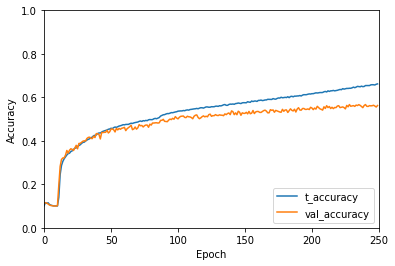

In [10]:
plt.plot(history.history['accuracy'], label='t_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.xlim([0, 250])
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = newModel.evaluate(test_images,  test_labels, verbose=2)

In [11]:
newModel.save("newCifar10")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: newCifar10/assets


## Loading and Evaluating the Model

In [15]:
cifar10model = models.load_model("newCifar10")

In [16]:
t1 = time.time()
loss, acc = cifar10model.evaluate(test_images, test_labels, verbose=2)
t2 = time.time()

print("elapsed:", (t2-t1)*1000, "ms")
print("average:", (t2-t1)*1000/(test_images.shape[0]), "ms")

313/313 - 1s - loss: 1.9007 - accuracy: 0.1025
elapsed: 1238.635540008545 ms
average: 0.1238635540008545 ms


In [17]:
# Continued Training

history = cifar10model.fit(train_images, train_labels, epochs=100,
                         validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - ETA: 0s - loss: 1.9963 - accuracy: 0.0967

KeyboardInterrupt: 

10000/10000 - 12s - loss: 1.2541 - accuracy: 0.6078


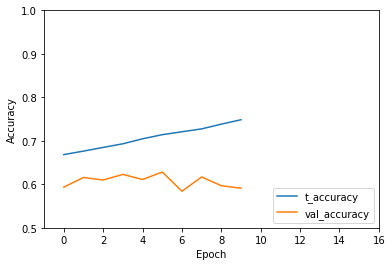

In [25]:
plt.plot(history.history['accuracy'], label='t_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.xlim([-1, 16])
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = newModel.evaluate(test_images,  test_labels, verbose=2)